# Approximating functions by their orthogonal projections

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sympy import *

%config InlineBackend.figure_format = 'retina'
init_printing(use_latex='mathjax')

## Side note: how to integrate functions with sympy

Declare a function variable:

In [2]:
t = Symbol("t") 

Define a function:

In [3]:
f = (1 + +3*t + 5*t**2)*sin(t)
f

⎛   2          ⎞       
⎝5⋅t  + 3⋅t + 1⎠⋅sin(t)

Compute the integral $\int f(t) dt$:

In [4]:
#integrate the function f with respect to the variable t
integrate(f, t) 

     2                                                        
- 5⋅t ⋅cos(t) + 10⋅t⋅sin(t) - 3⋅t⋅cos(t) + 3⋅sin(t) + 9⋅cos(t)

Compute the definite integral $\int_0^{\pi/2} f(t) dt$:

In [5]:
integrate(f, (t, 0, pi/2))

-6 + 5⋅π

## Fourier approximation

The code below plots the $n$-th degree Fourier approximation of the function $f(t) = t$:

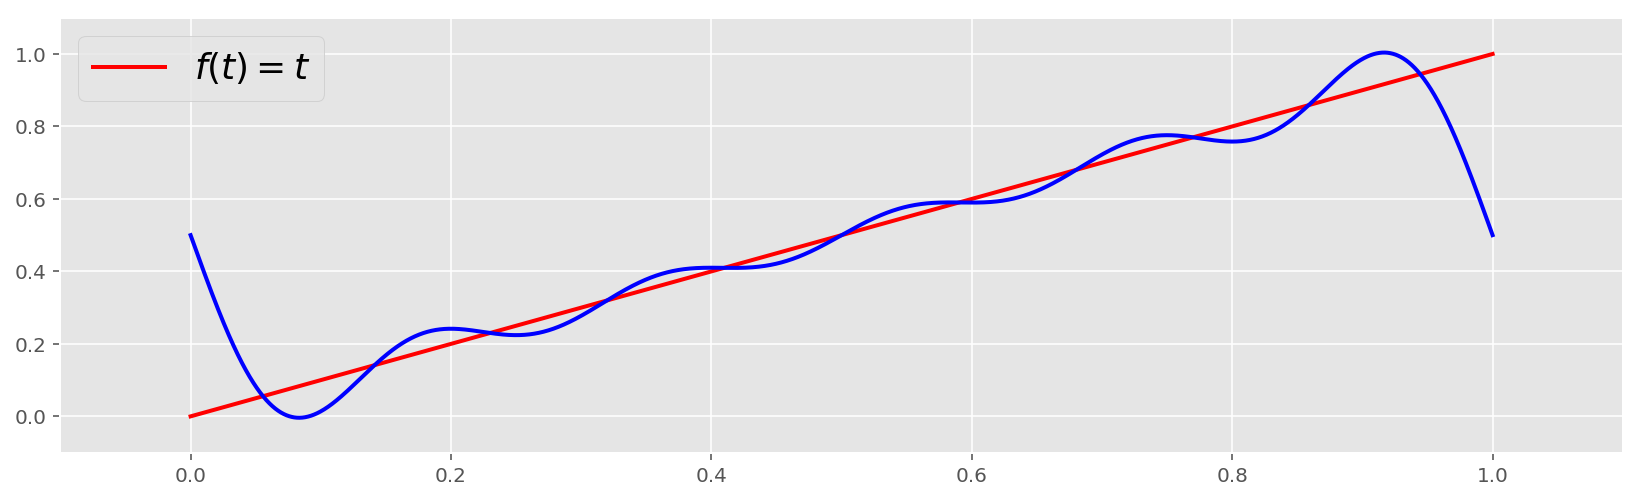

In [6]:
n = 5 #degree of the approximation
b = 1 #the range of x-values plotted is [0, b]


def fourierx(n):
    def fx(t):
        y = 0.5
        for i in range(n):
            y -= np.sin(2*np.pi*(i+1)*t)/(np.pi*(i+1))
        return y 
    return fx

fx = fourierx(n)
with plt.style.context('ggplot'):
    plt.figure(figsize=(14,4))
    plt.ylim(-0.1, 1.1)
    plt.xlim(-0.1, b + 0.1)
    x = np.linspace(0, b, 5000)
    plt.plot(x, x, 'r-', lw = 2,label=r'$f(t) = t$')
    plt.plot(x, fx(x), 'b-', lw = 2)
    plt.legend(fontsize = 18)
    plt.show()

## Polynomial approximation

We define the standard basis $\{1, t, t^2\}$ of the vector space of polynomials of degree $\leq 2$:

In [7]:
t = Symbol('t')
v1 = 1
v2 = t
v3 = t**2

The standard basis is not orthogonal. We use the Gram-Schmidt process to produce an orthogonal basis:

In [8]:
w1 = 1
w1

1

In [11]:
w2 = v2 - (integrate(w1*v2, (t, 0, 1))*integrate(w1*w1, (t, 0, 1)))*w1
w2

t - 1/2

In [12]:
w3 = v3 - (integrate(w1*v3, (t, 0, 1))/integrate(w1*w1, (t, 0, 1)))*w1 - (integrate(w2*v3, (t, 0, 1))/integrate(w2*w2, (t, 0, 1)))*w2
w3

 2       1
t  - t + ─
         6

We will use the above orthogonal basis to compute the orthogonal projection  of the function $f(t) = \sqrt{t}$ onto the space of quadratic polynomials:

In [13]:
f = sqrt(t)
f

√t

In [15]:
#compute the orthogonal projection of the function f 
pf = ((integrate(w1*f, (t, 0, 1))/integrate(w1*w1, (t, 0, 1)))*w1 
      + (integrate(w2*f, (t, 0, 1))/integrate(w2*w2, (t, 0, 1)))*w2
      + (integrate(w3*f, (t, 0, 1))/integrate(w3*w3, (t, 0, 1)))*w3
     )
pf

     2            
  4⋅t    48⋅t   6 
- ──── + ──── + ──
   7      35    35

Here we plot the function $f(t) = \sqrt{t}$ and its orthogonal projection:

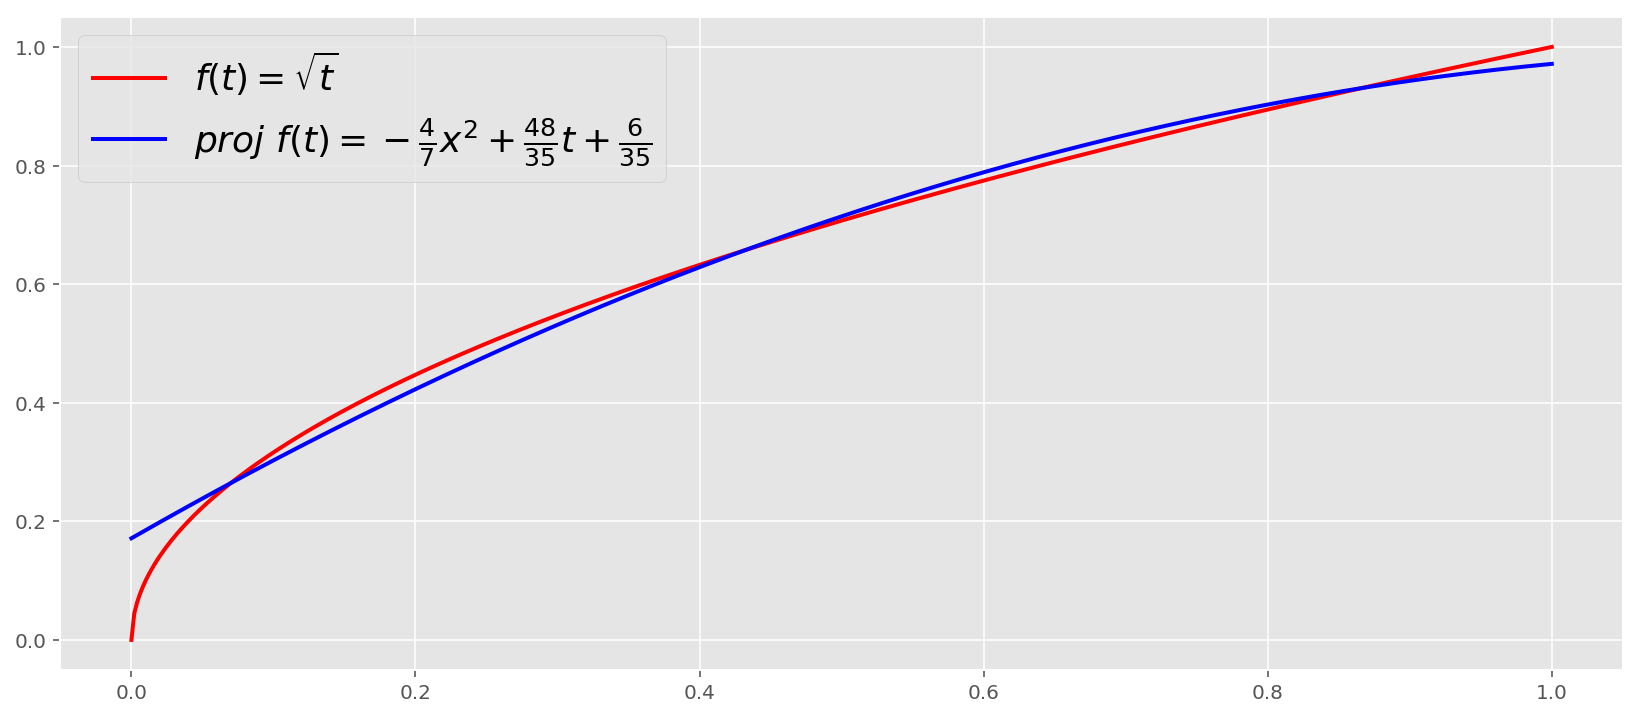

In [16]:
npf = lambdify(t, pf)

with plt.style.context('ggplot'):
    plt.figure(figsize=(14,6))
    x = np.linspace(0, 1, 500)
    plt.plot(x, x**0.5, 'r-', lw = 2, label=r'$f(t) =\sqrt{t}$')
    plt.plot(x, npf(x), 'b-', lw = 2, label=r'$proj\ f (t)= -\frac{4}{7}x^2 + \frac{48}{35}t + \frac{6}{35}$')
    plt.legend(fontsize = 18)
    plt.show()

For comparison, here is a plot of the approximation of $f(t) = \sqrt t$ given by the  $n$-th degree  Taylor polynomial computed at $t_0 = 1$:

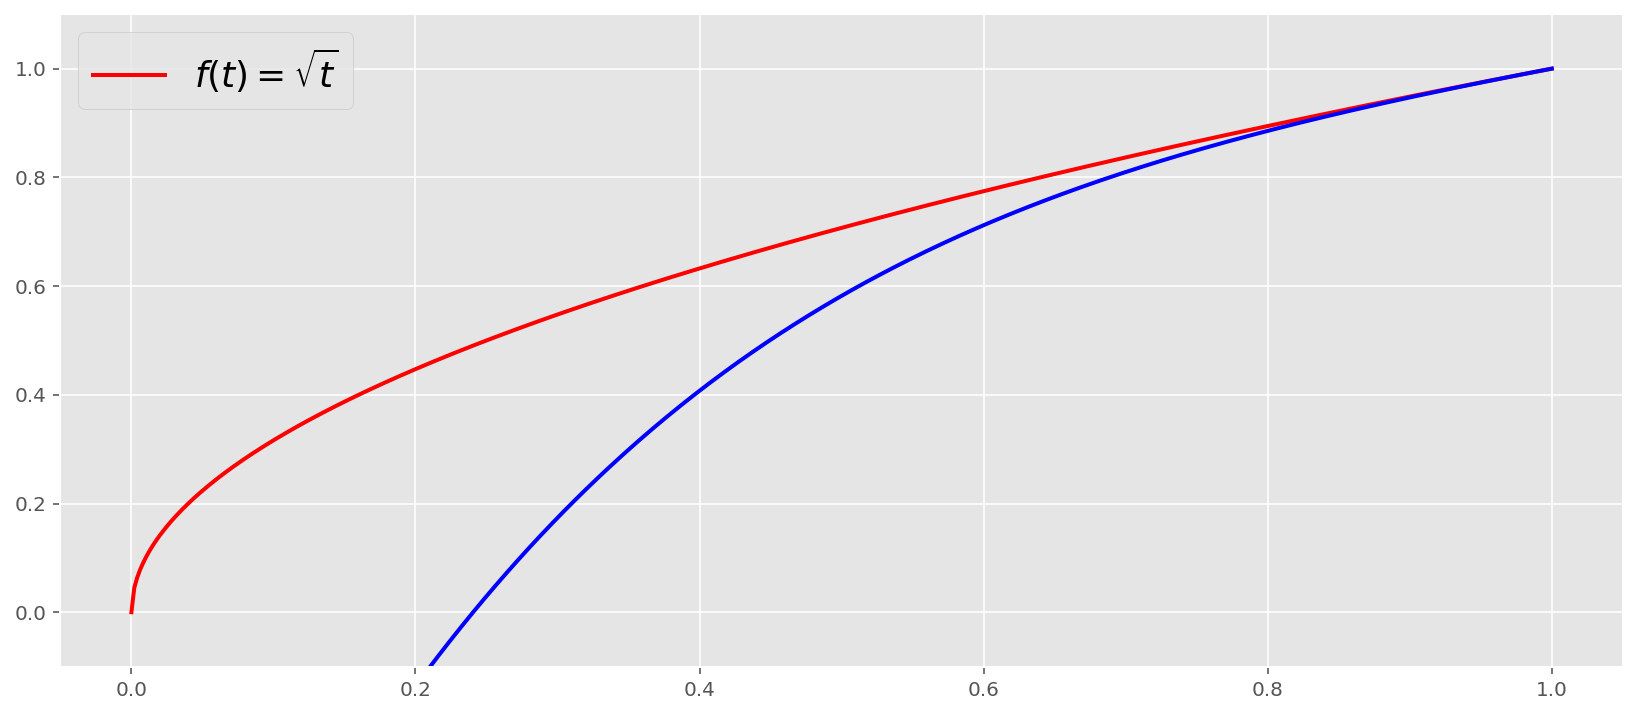

In [6]:
n = 4

def tf(x, n):
    y = 1
    df = 0.5
    ex = 0.5
    for i in range(n):
        y += df*(x-1)**(i+1)
        ex -= 1 
        df *= ex
    return y

with plt.style.context('ggplot'):
    plt.figure(figsize=(14,6))
    plt.ylim(-0.1, 1.1)
    x = np.linspace(0, 1, 500)
    plt.plot(x, x**0.5, 'r-', lw = 2, label=r'$f(t) =\sqrt{t}$')
    plt.plot(x, tf(x, n), 'b-', lw = 2)
    plt.legend(fontsize = 18)
    plt.show()